# **📌 Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import warnings
import sys
warnings.filterwarnings('ignore')
# Thiết lập style cho matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
sklearn.set_config(enable_metadata_routing=True)

In [2]:
sys.path.append("..")
from modules import tabular
import importlib

# **📥 Download Dataset**

In [3]:
import kagglehub
import os
import shutil

data_dir = "../data/canine_wellness/"
raw_data_dir = os.path.join(data_dir, "raw_data/")
data_file_name = "synthetic_dog_breed_health_data.csv"
model_result_path = os.path.join(data_dir, "model_result/")

In [4]:
os.makedirs(data_dir, exist_ok=True)

if os.path.exists(os.path.join(raw_data_dir, data_file_name)):
    print("Data file exists.")
else:
    path = kagglehub.dataset_download(
        handle="aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples"
    )
    src = os.path.join(path, data_file_name)
    os.makedirs(raw_data_dir, exist_ok=True)
    shutil.copy(src, raw_data_dir)

print("Path to data:", os.path.join(raw_data_dir, data_file_name))

Data file exists.
Path to data: ../data/canine_wellness/raw_data/synthetic_dog_breed_health_data.csv


In [5]:
df = pd.read_csv(os.path.join(raw_data_dir, data_file_name))
df.head()

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,...,Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,...,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,NaN,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,...,Yes,No,No,11.0,3.0,NaN,0.0,47.0,Yes,NaN
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,...,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,...,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,...,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No


# **📊 EDA**

In [6]:
tabular.dataset_info(df=df)


Dataset Info:
Total samples: 10,000
Features: 21
Data Shape: (10000, 21)
Columns: Index(['ID', 'Breed', 'Breed Size', 'Sex', 'Age', 'Weight (lbs)',
       'Spay/Neuter Status', 'Daily Activity Level', 'Diet', 'Food Brand',
       'Daily Walk Distance (miles)', 'Other Pets in Household', 'Medications',
       'Seizures', 'Hours of Sleep', 'Play Time (hrs)', 'Owner Activity Level',
       'Annual Vet Visits', 'Average Temperature (F)', 'Synthetic', 'Healthy'],
      dtype='object')
Dtypes:
 ID                               int64
Breed                           object
Breed Size                      object
Sex                             object
Age                            float64
Weight (lbs)                   float64
Spay/Neuter Status              object
Daily Activity Level            object
Diet                            object
Food Brand                      object
Daily Walk Distance (miles)    float64
Other Pets in Household         object
Medications                     objec

In [7]:
tabular.missing_report(df)

Missing Value:
                             Missing  Percent
Spay/Neuter Status              3567    35.67
Daily Activity Level            2230    22.30
Owner Activity Level            2227    22.27
Average Temperature (F)          345     3.45
Sex                              325     3.25
Healthy                          322     3.22
Synthetic                        310     3.10
Play Time (hrs)                  309     3.09
Annual Vet Visits                306     3.06
Diet                             302     3.02
Seizures                         301     3.01
Food Brand                       300     3.00
Other Pets in Household          298     2.98
Daily Walk Distance (miles)      294     2.94
Weight (lbs)                     291     2.91
Age                              291     2.91
Breed                            290     2.90
Breed Size                       288     2.88
Hours of Sleep                   279     2.79
Medications                      249     2.49
ID                 

In [8]:
tabular.column_report(df)

Column Report:
                              Dtypes  Nunique
ID                             int64    10000
Breed                         object       15
Breed Size                    object        3
Sex                           object        2
Age                          float64       13
Weight (lbs)                 float64       95
Spay/Neuter Status            object        2
Daily Activity Level          object        4
Diet                          object        4
Food Brand                    object        9
Daily Walk Distance (miles)  float64        9
Other Pets in Household       object        2
Medications                   object        2
Seizures                      object        2
Hours of Sleep               float64        7
Play Time (hrs)              float64        5
Owner Activity Level          object        4
Annual Vet Visits            float64        5
Average Temperature (F)      float64       71
Synthetic                     object        1
Healthy            

In [9]:
numeric_feature, numeric_stat = tabular.numeric_stat_report(df)
numeric_stat

,ID,Age,Weight (lbs),Daily Walk Distance (miles),Hours of Sleep,Play Time (hrs),Annual Vet Visits,Average Temperature (F)
count,10000.00000,9709.000000,9709.000000,9706.000000,9721.000000,9691.000000,9694.000000,9655.000000
mean,5000.50000,7.063858,50.202493,2.527818,11.006995,1.524095,1.474727,64.559606
std,2886.89568,3.751616,14.900010,1.458157,1.463321,0.979939,1.152881,14.824669
min,1.00000,1.000000,10.000000,0.000000,8.000000,0.000000,0.000000,30.000000
25%,2500.75000,4.000000,40.000000,1.250000,10.000000,1.000000,1.000000,54.000000
50%,5000.50000,7.000000,50.000000,3.000000,11.000000,2.000000,1.000000,64.000000
75%,7500.25000,10.000000,60.000000,3.000000,12.000000,2.000000,2.000000,75.000000
max,10000.00000,13.000000,109.000000,8.000000,14.000000,4.000000,4.000000,100.000000


In [10]:
df = df.drop(columns=["ID"])

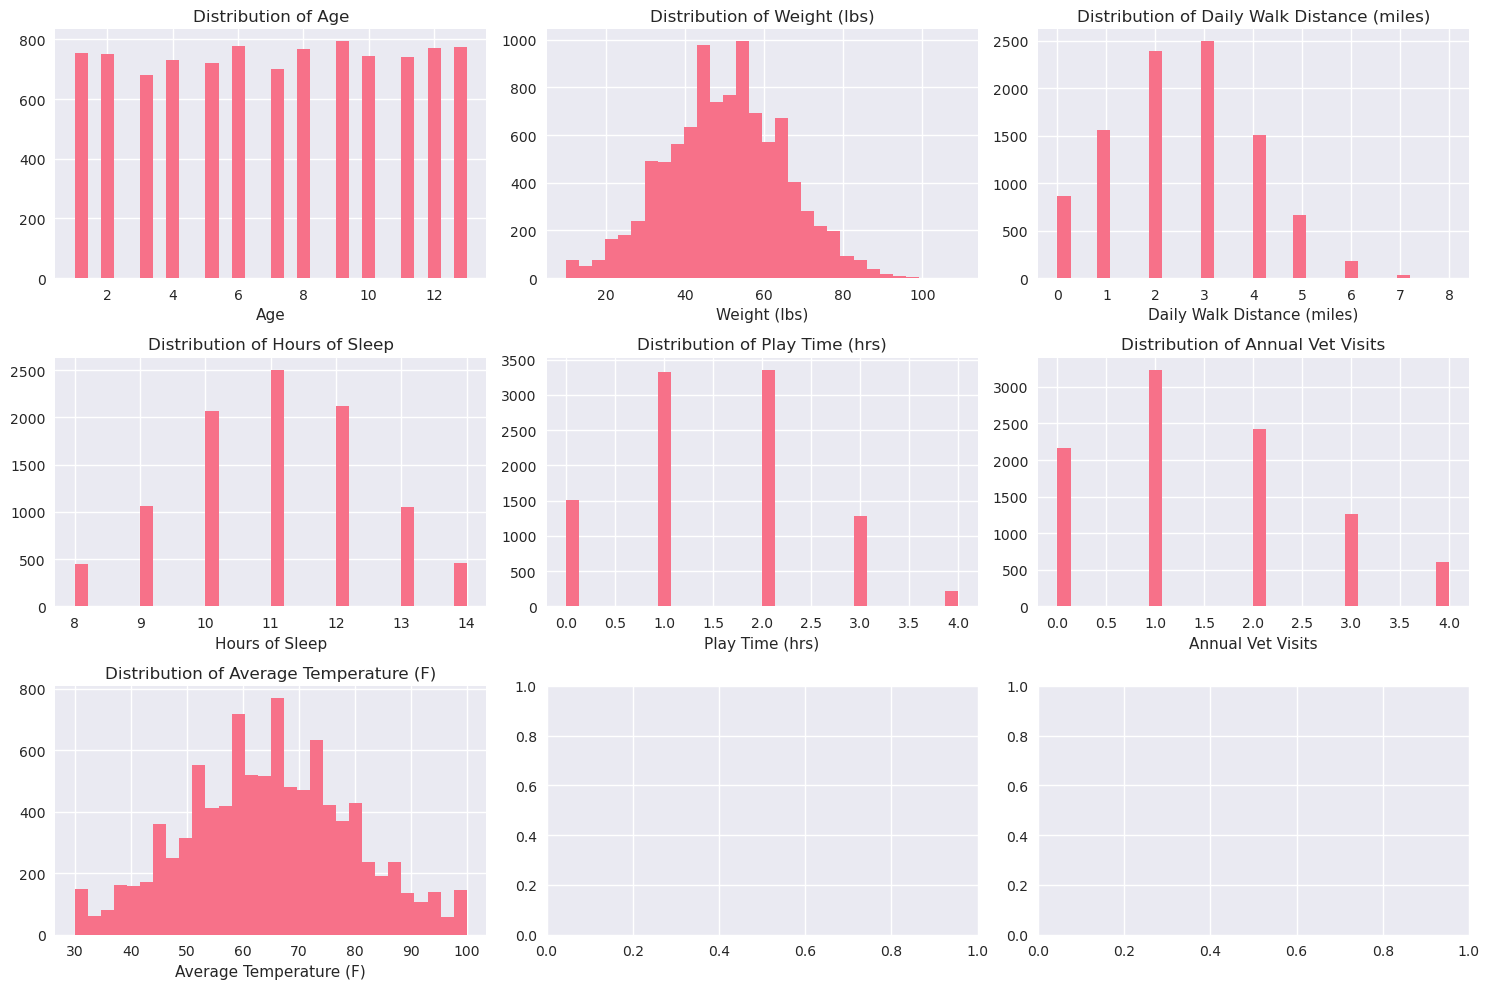

In [11]:
tabular.numeric_plot(df=df, config=None, plot="histogram")

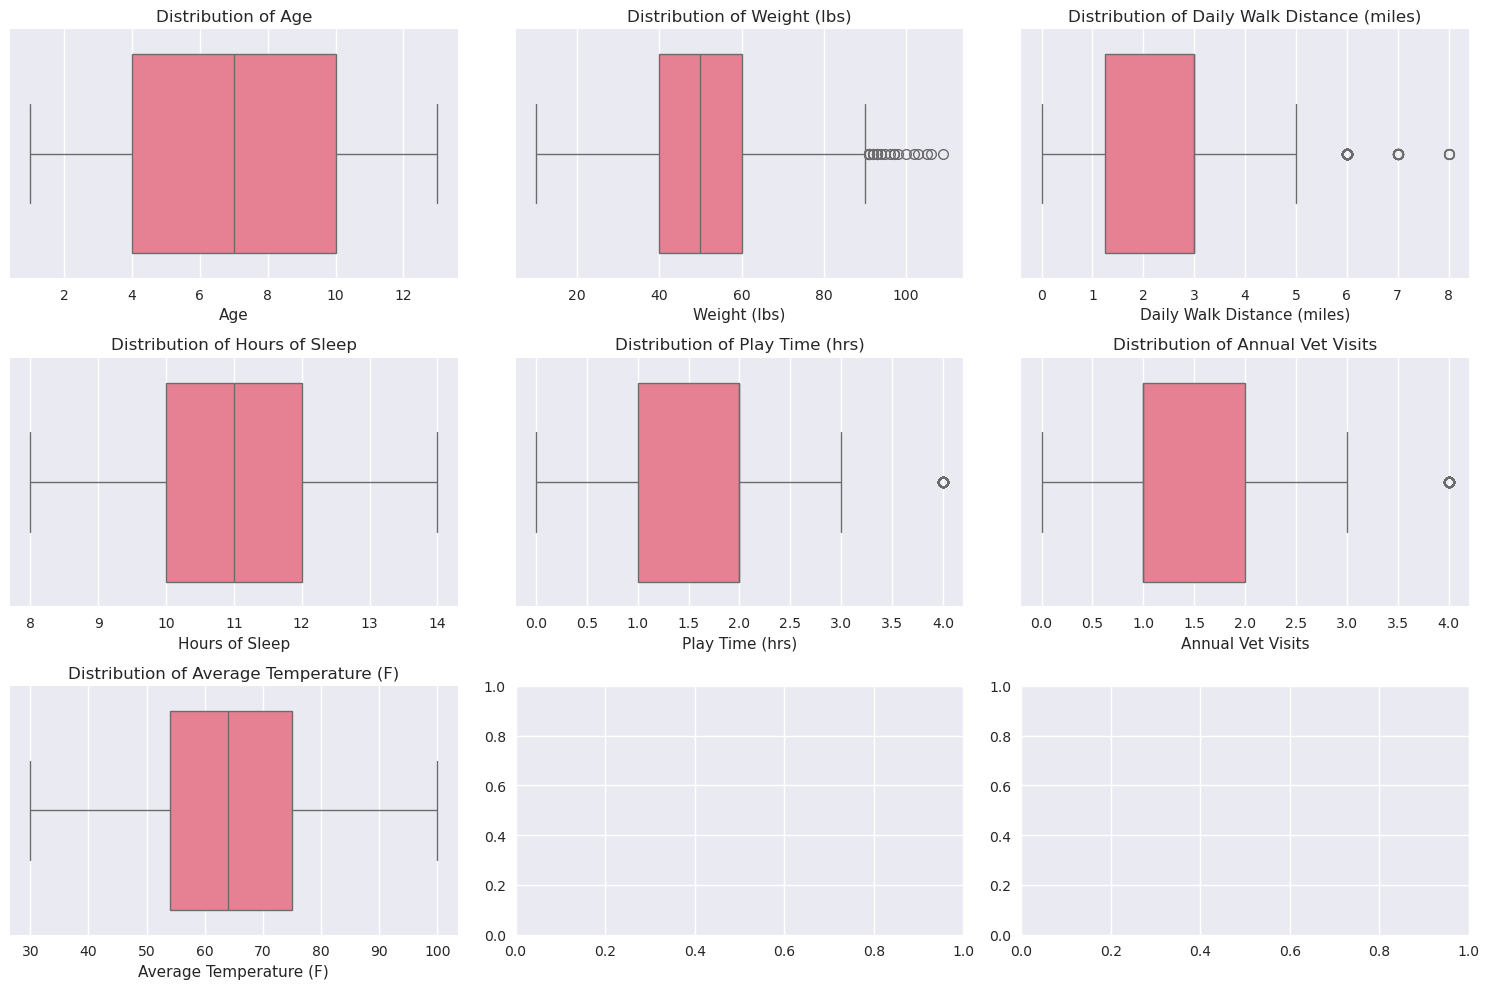

In [12]:
tabular.numeric_plot(df=df, config=None, plot="boxplot")

In [13]:
categorical_feature = tabular.categorical_stat_report(df)

================== Top 10 Breed ==================
Unique value: 15
Missing value: 290


Breed
Bulldog                685
Beagle                 682
Australian Shepherd    668
Dachshund              667
Golden Retriever       660
Chihuahua              658
Siberian Husky         652
Labrador Retriever     640
Boxer                  636
Doberman               636
Name: count, dtype: int64

================== Top 10 Breed Size ==================
Unique value: 3
Missing value: 288


Breed Size
Large     3824
Small     3232
Medium    2656
Name: count, dtype: int64

================== Top 10 Sex ==================
Unique value: 2
Missing value: 325


Sex
Male      4890
Female    4785
Name: count, dtype: int64

================== Top 10 Spay/Neuter Status ==================
Unique value: 2
Missing value: 3567


Spay/Neuter Status
Spayed      3222
Neutered    3211
Name: count, dtype: int64

================== Top 10 Daily Activity Level ==================
Unique value: 4
Missing value: 2230


Daily Activity Level
Active         1961
Low            1952
Moderate       1939
Very Active    1918
Name: count, dtype: int64

================== Top 10 Diet ==================
Unique value: 4
Missing value: 302


Diet
Wet food        2501
Home cooked     2475
Hard food       2390
Special diet    2332
Name: count, dtype: int64

================== Top 10 Food Brand ==================
Unique value: 9
Missing value: 300


Food Brand
Special           2484
Wellness           976
Iams               909
Nutro              907
Blue Buffalo       899
Royal Canin        895
Pedigree           887
Hill's Science     878
Purina             865
Name: count, dtype: int64

================== Top 10 Other Pets in Household ==================
Unique value: 2
Missing value: 298


Other Pets in Household
No     4922
Yes    4780
Name: count, dtype: int64

================== Top 10 Medications ==================
Unique value: 2
Missing value: 249


Medications
No     4938
Yes    4813
Name: count, dtype: int64

================== Top 10 Seizures ==================
Unique value: 2
Missing value: 301


Seizures
No     9214
Yes     485
Name: count, dtype: int64

================== Top 10 Owner Activity Level ==================
Unique value: 4
Missing value: 2227


Owner Activity Level
Very Active    1993
Active         1959
Moderate       1920
Low            1901
Name: count, dtype: int64

================== Top 10 Synthetic ==================
Unique value: 1
Missing value: 310


Synthetic
Yes    9690
Name: count, dtype: int64

================== Top 10 Healthy ==================
Unique value: 2
Missing value: 322


Healthy
Yes    7178
No     2500
Name: count, dtype: int64

# **Preprocessing**

In [14]:
cols = numeric_feature + categorical_feature
use_cols = [x for x in cols if x not in {"ID", "Spay/Neuter Status", "Daily Activity Level", "Owner Activity Level"}]

data = df[use_cols]

In [15]:
target = "Healthy"
data = data.dropna(subset=[target]) # Drop NA in target column

In [16]:
# If you don't choose to dropna in other columns of dataset, comment this cell
data = data.dropna()

In [17]:
X = data.drop(columns=target)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train data Shape: {X_train.shape}")
print(f"X_test data Shape: {X_test.shape}")

y_train = y_train.to_frame()
y_test = y_test.to_frame()

X_train data Shape: (4758, 16)
X_test data Shape: (1190, 16)


In [18]:
X_train

,Age,Weight (lbs),Daily Walk Distance (miles),Hours of Sleep,Play Time (hrs),Annual Vet Visits,Average Temperature (F),Breed,Breed Size,Sex,Diet,Food Brand,Other Pets in Household,Medications,Seizures,Synthetic
4426,8.0,46.0,4.0,11.0,1.0,3.0,85.0,Australian Shepherd,Medium,Female,Wet food,Blue Buffalo,Yes,Yes,No,Yes
1065,9.0,71.0,3.0,10.0,1.0,1.0,38.0,Rottweiler,Large,Female,Home cooked,Special,No,No,No,Yes
2133,8.0,23.0,3.0,12.0,1.0,3.0,70.0,Chihuahua,Small,Male,Home cooked,Special,No,No,No,Yes
2387,1.0,38.0,1.0,10.0,4.0,3.0,45.0,Poodle,Small,Male,Hard food,Royal Canin,No,Yes,No,Yes
8366,13.0,43.0,4.0,8.0,1.0,4.0,65.0,Great Dane,Large,Male,Home cooked,Special,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,3.0,88.0,2.0,11.0,2.0,2.0,60.0,Labrador Retriever,Large,Female,Hard food,Pedigree,No,No,No,Yes
8710,6.0,59.0,3.0,9.0,3.0,0.0,72.0,Golden Retriever,Large,Female,Hard food,Blue Buffalo,Yes,No,No,Yes
8775,2.0,46.0,1.0,9.0,0.0,4.0,72.0,Yorkshire Terrier,Small,Female,Wet food,Blue Buffalo,Yes,No,No,Yes
9059,1.0,42.0,1.0,12.0,2.0,2.0,56.0,Labrador Retriever,Large,Female,Home cooked,Special,Yes,Yes,No,Yes


In [19]:
num_imputer_dict = tabular.get_preprocesser("num_impute", "all")
cate_imputer_dict = tabular.get_preprocesser("cate_impute", "all")

print("num_imputer_dict:\n", num_imputer_dict)
print("cate_imputer_dict\n", cate_imputer_dict)

num_imputer_dict:
 {'mean': SimpleImputer(), 'median': SimpleImputer(strategy='median'), 'constant': SimpleImputer(strategy='constant')}
cate_imputer_dict
 {'most': SimpleImputer(strategy='most_frequent'), 'constant': SimpleImputer(strategy='constant')}


In [20]:
missing_config = { # Example of config
    "numeric": (num_imputer_dict["mean"], [0, 1, 2, 3]),
    "categorical": (cate_imputer_dict["most"], [4, 5])
}

missing_value_pipeline = tabular.make_column_pipeline(missing_config)

In [21]:
scaler_dict = tabular.get_preprocesser("scale", "all")

print("scaler_dict:\n", scaler_dict)

scaler_dict:
 {'standard': StandardScaler(), 'minmax': MinMaxScaler(), 'robust': RobustScaler(), 'log1p_robust': Log1pRobustScaler()}


In [22]:
scaling_config = { # Example of config
    "std_scaler": (scaler_dict["standard"], np.arange(7))
}

scaling_pipeline = tabular.make_column_pipeline(scaling_config)

In [23]:
pca_dict = tabular.get_preprocesser("pca", "all")

print("pca_dict:\n", pca_dict)

pca_dict:
 {'pca_0.95_auto': PCA(n_components=0.95), 'pca_0.95_full': PCA(n_components=0.99, svd_solver='full'), 'pca_0.99_auto': PCA(n_components=0.99), 'pca_0.99_full': PCA(n_components=0.99, svd_solver='full')}


In [24]:
pca_config = {
    "pca_0.99_auto": (pca_dict["pca_0.95_auto"], np.arange(7))
}

pca_pipeline = tabular.make_column_pipeline(pca_config)

In [25]:
encoder_dict = tabular.get_preprocesser("encode", "all")

print("encoder_dict:\n", encoder_dict)

encoder_dict:
 {'onehot': OneHotEncoder(handle_unknown='ignore', sparse_output=False), 'ordinal': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)}


In [26]:
encoding_config = { # Example of config
    "onehot_encoder": (encoder_dict["ordinal"], np.arange(7, 16))
}

# Default encoding pipeline
encoding_pipeline = tabular.make_column_pipeline(encoding_config)

## Processing pipeline

In [27]:
# Preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    # ("missing", missing_value_pipeline),
    ("scaling", scaling_pipeline),
    # ("pca", pca_pipeline),
    ("encoding", encoding_pipeline)
])

# **Train & Evaluate Model**


In [28]:
y_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

In [29]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [30]:
from sklearn.model_selection import ParameterGrid
# Model chosing
param_grid = [
    {
        "model": [LogisticRegression()],
    },
    {
        "model": [RandomForestClassifier()],
    },
    {
        "model": [SVC()],
    },
    {
        "model": [MLPClassifier()],
    }
]
grid = ParameterGrid(param_grid=param_grid)

In [31]:
results = []

for params in grid:
    # Tạo pipeline với model tương ứng
    pipe = Pipeline([
        # ("preprocess", preprocessing_pipeline),
        ("model", params["model"])
    ])
    pipe.set_params(**params)
    pipe.set_output(transform="pandas")

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)

    # Lưu kết quả
    results.append({
        "Params": params["model"].__class__.__name__,
        "accuracy": acc,
        "precision": pre,
        "recall": recall,
        "f1": f1
    })

# Xuất kết quả ra DataFrame
df_results = pd.DataFrame(results)
print(df_results)

                   Params  accuracy  precision    recall        f1
0      LogisticRegression  0.789076   0.823705  0.917869  0.868241
1  RandomForestClassifier  0.853782   0.879833  0.934517  0.906351
2                     SVC  0.797479   0.803309  0.970033  0.878834
3           MLPClassifier  0.822689   0.878289  0.889012  0.883618


# **Autotrain model with multi config**

In [32]:
preprocess_config = [
    {
        "num_impute": num_impute,
        "cate_impute": cate_impute,
        "scale": scale,
        "pca": pca,
        "encode": encode
    }
    for num_impute in ["none", "mean", "median"]
    for cate_impute in ["none", "most"]
    for scale in ["none", "standard", "minmax"]
    for pca in ["none", "pca_0.95_auto", "pca_0.95_full", "pca_0.99_auto", "pca_0.99_full"]
    for encode in ["onehot", "ordinal"]
]
# You can make a new param grid for multi model

In [33]:
main_data = df[use_cols]

In [34]:
main_data

,Age,Weight (lbs),Daily Walk Distance (miles),Hours of Sleep,Play Time (hrs),Annual Vet Visits,Average Temperature (F),Breed,Breed Size,Sex,Diet,Food Brand,Other Pets in Household,Medications,Seizures,Synthetic,Healthy
0,3.0,60.0,5.0,12.0,1.0,1.0,30.0,Australian Shepherd,Medium,Male,NaN,Wellness,No,Yes,No,Yes,Yes
1,4.0,57.0,2.0,11.0,3.0,0.0,47.0,Dachshund,NaN,Female,Home cooked,Special,Yes,No,No,Yes,NaN
2,12.0,67.0,1.0,10.0,1.0,0.0,92.0,Chihuahua,Small,Female,Home cooked,Special,Yes,No,No,Yes,Yes
3,13.0,35.0,4.0,12.0,NaN,1.0,75.0,Siberian Husky,Medium,Male,NaN,Special,No,No,No,Yes,Yes
4,13.0,35.0,3.0,9.0,1.0,0.0,64.0,Boxer,Medium,Male,Wet food,Purina,Yes,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,62.0,3.0,12.0,3.0,1.0,65.0,Yorkshire Terrier,Small,Female,Wet food,Wellness,No,No,No,Yes,Yes
9996,1.0,39.0,2.0,13.0,0.0,0.0,54.0,Dachshund,Small,Male,Special diet,Purina,No,No,Yes,Yes,NaN
9997,10.0,40.0,0.0,12.0,2.0,1.0,60.0,German Shepherd,Large,NaN,Hard food,Royal Canin,No,Yes,No,Yes,NaN
9998,13.0,57.0,1.0,9.0,2.0,0.0,53.0,Boxer,Medium,Female,Special diet,Hill's Science,No,No,Yes,Yes,No


In [35]:
split_datasets = tabular.preprocess(preprocess_config, main_data, "Healthy")

In [36]:
split_datasets

,num_impute,cate_impute,scale,pca,encode,data
0,none,none,none,none,onehot,"([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,none,none,none,none,ordinal,"([[0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0..."
2,none,none,none,pca_0.95_auto,onehot,"([[-16.386441885617472, 13.050968178787144, 1...."
3,none,none,none,pca_0.95_auto,ordinal,"([[-16.386441885617472, 13.050968178787144, 0...."
4,none,none,none,pca_0.95_full,onehot,"([[-16.386441885617177, 13.050968178787565, 0...."
...,...,...,...,...,...,...
175,median,most,minmax,pca_0.95_full,ordinal,"([[0.05049220710291431, 0.381071232714187, 0.0..."
176,median,most,minmax,pca_0.99_auto,onehot,"([[0.050492207102916076, 0.3810712327141874, 0..."
177,median,most,minmax,pca_0.99_auto,ordinal,"([[0.050492207102916076, 0.3810712327141874, 0..."
178,median,most,minmax,pca_0.99_full,onehot,"([[0.05049220710291431, 0.381071232714187, 0.0..."


In [40]:
importlib.reload(tabular)

<module 'modules.tabular' from '/home/nhan/BT_ML/ML-DL-utils/notebooks/../modules/tabular.py'>

In [41]:
for params in grid:
    csv_path = os.path.join(model_result_path, f"{params["model"].__class__.__name__}.csv") # Change .csv name if you train one model with different config
    os.makedirs(model_result_path, exist_ok=True)
    if not os.path.exists(csv_path):
        print(f"Training {params["model"].__class__.__name__}")
        model_result = tabular.train_one_model(params, split_datasets, "f1", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        model_result.to_csv(csv_path, index=False)
    else:
        print(f"Model {params["model"].__class__.__name__} has been trained before.")

Training LogisticRegression


Training: 100%|██████████| 180/180 [00:02<00:00, 61.53it/s] 


Training RandomForestClassifier


Training: 100%|██████████| 180/180 [01:44<00:00,  1.72it/s]


Training SVC


Training: 100%|██████████| 180/180 [01:23<00:00,  2.16it/s]


Training MLPClassifier


Training: 100%|██████████| 180/180 [07:01<00:00,  2.34s/it]


In [ ]:
linear_results = pd.read_csv(os.path.join(model_result_path, f"{grid[0]["model"].__class__.__name__}.csv"))
linear_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
40,none,none,log1p_robust,none,onehot,0.827169
42,none,none,log1p_robust,pca_0.95_auto,onehot,0.827169
92,none,most,log1p_robust,pca_0.95_auto,onehot,0.827169
96,none,most,log1p_robust,pca_0.99_auto,onehot,0.827169
90,none,most,log1p_robust,none,onehot,0.827169
...,...,...,...,...,...,...
223,median,none,minmax,pca_0.95_auto,ordinal,-347.767551
173,mean,most,minmax,pca_0.95_auto,ordinal,-347.767551
123,mean,none,minmax,pca_0.95_auto,ordinal,-347.767551
73,none,most,minmax,pca_0.95_auto,ordinal,-347.767551


In [ ]:
random_forest_results = pd.read_csv(os.path.join(model_result_path, f"{grid[1]["model"].__class__.__name__}.csv"))
random_forest_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
229,median,none,minmax,pca_0.99_auto,ordinal,0.995882
128,mean,none,minmax,pca_0.99_auto,onehot,0.995731
223,median,none,minmax,pca_0.95_auto,ordinal,0.995631
177,mean,most,minmax,pca_0.99_auto,ordinal,0.995610
226,median,none,minmax,pca_0.99_auto,onehot,0.995588
...,...,...,...,...,...,...
207,median,none,none,pca_0.99_auto,ordinal,0.768116
3,none,none,none,pca_0.95_auto,ordinal,0.768108
253,median,most,none,pca_0.95_auto,ordinal,0.767777
109,mean,none,none,pca_0.99_auto,ordinal,0.767539


In [ ]:
svr_results = pd.read_csv(os.path.join(model_result_path, f"{grid[2]["model"].__class__.__name__}.csv"))
svr_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
294,median,most,log1p_robust,pca_0.95_full,onehot,0.962229
296,median,most,log1p_robust,pca_0.99_auto,onehot,0.962229
244,median,none,log1p_robust,pca_0.95_full,onehot,0.962229
194,mean,most,log1p_robust,pca_0.95_full,onehot,0.962229
198,mean,most,log1p_robust,pca_0.99_auto,onehot,0.962229
...,...,...,...,...,...,...
0,none,none,none,none,onehot,-109677.219807
200,median,none,none,none,onehot,-109677.219807
250,median,most,none,none,onehot,-109677.219807
100,mean,none,none,none,onehot,-109677.219807


In [ ]:
mlp_results = pd.read_csv(os.path.join(model_result_path, f"{grid[3]["model"].__class__.__name__}.csv"))
mlp_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
196,median,none,log1p_robust,pca_0.99_auto,onehot,0.982968
72,none,most,log1p_robust,pca_0.95_auto,onehot,0.982762
78,none,most,log1p_robust,pca_0.99_full,onehot,0.982220
32,none,none,log1p_robust,pca_0.95_auto,onehot,0.981778
36,none,none,log1p_robust,pca_0.99_auto,onehot,0.981590
...,...,...,...,...,...,...
21,none,none,robust,none,ordinal,0.228838
185,median,none,robust,pca_0.95_full,ordinal,-0.250195
227,median,most,robust,pca_0.99_auto,ordinal,-0.305776
147,mean,most,robust,pca_0.99_auto,ordinal,-20.759072
